In [1]:
!pip install scikit-multiflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1254678 sha256=3ebce46a4f9e82013528309f5a1f8d820de93613e65860779ff99d098027fadc
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import copy
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from skmultiflow.drift_detection import ADWIN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive





# Read data chunks




In [4]:
import pickle

# Load the list of dataframes from disk
with open('/content/drive/MyDrive/Covid files/df_symptoms_chunks_data.pkl', 'rb') as f:
    df_list = pickle.load(f)


In [5]:
y_df = pd.read_csv('/content/drive/MyDrive/Covid files/y_df.csv')
y_df

# Encode the 'class' column as integers
le = LabelEncoder()
y_df = le.fit_transform(y_df)

# Convert the target variable to integers
y_df = y_df.astype(int)


y_df_list = []
c=0
for i in range(len(df_list)):
  yy = y_df[c:c+len(df_list[i])]
  y_df_list.append(yy)
  c+=len(df_list[i])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
from skmultiflow.drift_detection import ADWIN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Define the number of chunks and their sizes
num_chunks = 15
chunk_size = 100

# Generate sample time series data
# Replace this with your own data loading/preparation process
time_series_data = np.random.rand(num_chunks * chunk_size, 5)
concept_variable = np.random.randint(2, size=num_chunks * chunk_size)

# Initialize the ADWIN algorithm
adwin = ADWIN(0.00001)

# Initialize the model
model = LogisticRegression()

# Iterate over consecutive chunks
for i in range(len(df_list)-1):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size

    # Train the model on the current chunk
    model.fit(df_list[i], y_df_list[i])

    # Evaluate the model on the next chunk
    predictions = model.predict(df_list[i+1])
    true_labels = y_df_list[i+1]

    # # Calculate the accuracy of the model on the next chunk
    # accuracy = accuracy_score(true_labels, predictions)

    # # Update the ADWIN algorithm with the accuracy
    # adwin.add_element(accuracy)

    output = np.not_equal(true_labels, predictions).astype(int)
    print(output)
    # Update the DDM algorithm with the accuracy
    for j in range(len(output)):
      adwin.add_element(output[j])


      # Check for concept drift
      if adwin.detected_change():
          print(f"Concept drift detected between chunks {i} and {i + 1} : {output[j]} at {j}")

          # Reset the ADWIN algorithm
          adwin.reset()

    # Take appropriate actions based on concept drift detection
    if adwin.detected_change():
        # Perform model updates, retraining, or system adaptations
        pass

[0 1 1 ... 0 0 0]
Concept drift detected between chunks 0 and 1 : 1 at 3071
Concept drift detected between chunks 0 and 1 : 0 at 11263
Concept drift detected between chunks 0 and 1 : 1 at 41215
Concept drift detected between chunks 0 and 1 : 0 at 67743
Concept drift detected between chunks 0 and 1 : 1 at 84767
Concept drift detected between chunks 0 and 1 : 0 at 113439


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 1 0 ... 0 0 0]
Concept drift detected between chunks 1 and 2 : 0 at 3606
Concept drift detected between chunks 1 and 2 : 1 at 39318
Concept drift detected between chunks 1 and 2 : 1 at 76694
Concept drift detected between chunks 1 and 2 : 0 at 83862
Concept drift detected between chunks 1 and 2 : 0 at 87766
Concept drift detected between chunks 1 and 2 : 1 at 93270
Concept drift detected between chunks 1 and 2 : 0 at 103510
Concept drift detected between chunks 1 and 2 : 0 at 109142
Concept drift detected between chunks 1 and 2 : 1 at 117622
Concept drift detected between chunks 1 and 2 : 0 at 134294
Concept drift detected between chunks 1 and 2 : 0 at 138902
Concept drift detected between chunks 1 and 2 : 0 at 145046
Concept drift detected between chunks 1 and 2 : 1 at 159702
Concept drift detected between chunks 1 and 2 : 1 at 179670
Concept drift detected between chunks 1 and 2 : 0 at 204502
Concept drift detected between chunks 1 and 2 : 1 at 211190
Concept drift detected betwee

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 1 0 ... 1 0 1]
Concept drift detected between chunks 2 and 3 : 0 at 13703
Concept drift detected between chunks 2 and 3 : 0 at 38279
Concept drift detected between chunks 2 and 3 : 0 at 40839
Concept drift detected between chunks 2 and 3 : 0 at 44935
Concept drift detected between chunks 2 and 3 : 0 at 67463
Concept drift detected between chunks 2 and 3 : 0 at 70023
Concept drift detected between chunks 2 and 3 : 0 at 79431
Concept drift detected between chunks 2 and 3 : 0 at 91719
Concept drift detected between chunks 2 and 3 : 1 at 99431
Concept drift detected between chunks 2 and 3 : 0 at 111975
Concept drift detected between chunks 2 and 3 : 1 at 123239
Concept drift detected between chunks 2 and 3 : 0 at 128583
Concept drift detected between chunks 2 and 3 : 0 at 137799
Concept drift detected between chunks 2 and 3 : 1 at 156871
Concept drift detected between chunks 2 and 3 : 0 at 185415
Concept drift detected between chunks 2 and 3 : 0 at 224327
Concept drift detected between 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 0 1 ... 0 1 0]
Concept drift detected between chunks 3 and 4 : 0 at 2641
Concept drift detected between chunks 3 and 4 : 0 at 21649
Concept drift detected between chunks 3 and 4 : 0 at 95377
Concept drift detected between chunks 3 and 4 : 1 at 246609


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 1 0 ... 0 0 0]
Concept drift detected between chunks 4 and 5 : 1 at 18973
Concept drift detected between chunks 4 and 5 : 1 at 74909
Concept drift detected between chunks 4 and 5 : 1 at 147485
Concept drift detected between chunks 4 and 5 : 1 at 161821
Concept drift detected between chunks 4 and 5 : 0 at 227357
Concept drift detected between chunks 4 and 5 : 0 at 272413
Concept drift detected between chunks 4 and 5 : 0 at 306621
Concept drift detected between chunks 4 and 5 : 0 at 312765
Concept drift detected between chunks 4 and 5 : 0 at 341437
Concept drift detected between chunks 4 and 5 : 0 at 351677
Concept drift detected between chunks 4 and 5 : 0 at 380349
Concept drift detected between chunks 4 and 5 : 0 at 421277


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 1 ... 1 0 0]
Concept drift detected between chunks 5 and 6 : 0 at 22639
Concept drift detected between chunks 5 and 6 : 0 at 24431
Concept drift detected between chunks 5 and 6 : 0 at 28495
Concept drift detected between chunks 5 and 6 : 0 at 48303
Concept drift detected between chunks 5 and 6 : 0 at 56495
Concept drift detected between chunks 5 and 6 : 0 at 62639
Concept drift detected between chunks 5 and 6 : 0 at 67759
Concept drift detected between chunks 5 and 6 : 0 at 73231
Concept drift detected between chunks 5 and 6 : 0 at 80399
Concept drift detected between chunks 5 and 6 : 0 at 96783
Concept drift detected between chunks 5 and 6 : 0 at 111023
Concept drift detected between chunks 5 and 6 : 0 at 123695
Concept drift detected between chunks 5 and 6 : 0 at 133935
Concept drift detected between chunks 5 and 6 : 1 at 149743
Concept drift detected between chunks 5 and 6 : 0 at 153327
Concept drift detected between chunks 5 and 6 : 0 at 171343
Concept drift detected between c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 0 ... 1 0 0]
Concept drift detected between chunks 6 and 7 : 0 at 24995
Concept drift detected between chunks 6 and 7 : 1 at 42499
Concept drift detected between chunks 6 and 7 : 0 at 62979
Concept drift detected between chunks 6 and 7 : 0 at 99843
Concept drift detected between chunks 6 and 7 : 0 at 112131
Concept drift detected between chunks 6 and 7 : 0 at 126083
Concept drift detected between chunks 6 and 7 : 1 at 157827
Concept drift detected between chunks 6 and 7 : 0 at 223363
Concept drift detected between chunks 6 and 7 : 0 at 255747
Concept drift detected between chunks 6 and 7 : 0 at 287811
Concept drift detected between chunks 6 and 7 : 1 at 296291
Concept drift detected between chunks 6 and 7 : 0 at 301091
Concept drift detected between chunks 6 and 7 : 1 at 333347
Concept drift detected between chunks 6 and 7 : 0 at 337187


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 0 ... 0 0 0]
Concept drift detected between chunks 7 and 8 : 0 at 49235
Concept drift detected between chunks 7 and 8 : 0 at 61907
Concept drift detected between chunks 7 and 8 : 0 at 93427
Concept drift detected between chunks 7 and 8 : 1 at 133011
Concept drift detected between chunks 7 and 8 : 0 at 151443
Concept drift detected between chunks 7 and 8 : 1 at 165779
Concept drift detected between chunks 7 and 8 : 0 at 276339
Concept drift detected between chunks 7 and 8 : 0 at 291699
Concept drift detected between chunks 7 and 8 : 1 at 357235
Concept drift detected between chunks 7 and 8 : 0 at 439155
Concept drift detected between chunks 7 and 8 : 0 at 457587
Concept drift detected between chunks 7 and 8 : 0 at 464883
Concept drift detected between chunks 7 and 8 : 1 at 485939
Concept drift detected between chunks 7 and 8 : 1 at 525747
Concept drift detected between chunks 7 and 8 : 0 at 556051
Concept drift detected between chunks 7 and 8 : 0 at 570387
Concept drift detected be

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 ... 0 0 0]
Concept drift detected between chunks 8 and 9 : 0 at 3095
Concept drift detected between chunks 8 and 9 : 1 at 34231
Concept drift detected between chunks 8 and 9 : 0 at 42743
Concept drift detected between chunks 8 and 9 : 0 at 89847
Concept drift detected between chunks 8 and 9 : 1 at 192503
Concept drift detected between chunks 8 and 9 : 0 at 266743
Concept drift detected between chunks 8 and 9 : 1 at 322039


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 1 ... 0 0 0]
Concept drift detected between chunks 9 and 10 : 1 at 30050
Concept drift detected between chunks 9 and 10 : 0 at 110690
Concept drift detected between chunks 9 and 10 : 1 at 137538
Concept drift detected between chunks 9 and 10 : 0 at 165058
Concept drift detected between chunks 9 and 10 : 0 at 238786
Concept drift detected between chunks 9 and 10 : 0 at 275650
Concept drift detected between chunks 9 and 10 : 0 at 310050
Concept drift detected between chunks 9 and 10 : 0 at 334626
Concept drift detected between chunks 9 and 10 : 0 at 368706
Concept drift detected between chunks 9 and 10 : 0 at 417858
Concept drift detected between chunks 9 and 10 : 1 at 432770


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 1 ... 1 0 1]
Concept drift detected between chunks 10 and 11 : 1 at 22898
Concept drift detected between chunks 10 and 11 : 1 at 25458
Concept drift detected between chunks 10 and 11 : 1 at 32978
Concept drift detected between chunks 10 and 11 : 0 at 40562
Concept drift detected between chunks 10 and 11 : 1 at 50194
Concept drift detected between chunks 10 and 11 : 0 at 66578
Concept drift detected between chunks 10 and 11 : 0 at 92178
Concept drift detected between chunks 10 and 11 : 1 at 122962
Concept drift detected between chunks 10 and 11 : 1 at 128594
Concept drift detected between chunks 10 and 11 : 0 at 153170
Concept drift detected between chunks 10 and 11 : 1 at 251474
Concept drift detected between chunks 10 and 11 : 1 at 263570
Concept drift detected between chunks 10 and 11 : 1 at 292242
Concept drift detected between chunks 10 and 11 : 0 at 311026


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 1 ... 0 0 0]
Concept drift detected between chunks 11 and 12 : 0 at 7463
Concept drift detected between chunks 11 and 12 : 1 at 18055
Concept drift detected between chunks 11 and 12 : 0 at 38023
Concept drift detected between chunks 11 and 12 : 0 at 46599
Concept drift detected between chunks 11 and 12 : 0 at 58375
Concept drift detected between chunks 11 and 12 : 1 at 105703


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 ... 1 0 0]
Concept drift detected between chunks 12 and 13 : 0 at 12972
Concept drift detected between chunks 12 and 13 : 0 at 48812
[1 0 0 ... 1 1 0]
Concept drift detected between chunks 13 and 14 : 0 at 966


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from skmultiflow.drift_detection import ADWIN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
from scipy import sparse


# Define the number of chunks and their sizes
num_chunks = 15
chunk_size = 100

# Generate sample time series data
# Replace this with your own data loading/preparation process
time_series_data = np.random.rand(num_chunks * chunk_size, 5)
concept_variable = np.random.randint(2, size=num_chunks * chunk_size)

# Initialize the ADWIN algorithm
adwin = ADWIN(0.0001)

# Initialize the model
model = LogisticRegression()
booster = None
# Iterate over consecutive chunks
for i in range(len(df_list)-1):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size

    X_train_sparse = sparse.csr_matrix(df_list[i])
    X_test_sparse = sparse.csr_matrix(df_list[i+1])
    dtrain = xgb.DMatrix(X_train_sparse, label=y_df_list[i])
    dtest = xgb.DMatrix(X_test_sparse, label=y_df_list[i+1])
    params = {'objective': 'multi:softmax', 'max_depth': 3,'num_class': 4,"eval_metric": ['merror']}
    booster = xgb.train(params, dtrain, xgb_model=booster, verbose_eval=False)

    # # Train the model on the current chunk
    # model.fit(df_list[i], y_df_list[i])

    # Evaluate the model on the next chunk
    predictions = booster.predict(dtest)
    true_labels = y_df_list[i+1]

    # # Calculate the accuracy of the model on the next chunk
    # accuracy = accuracy_score(true_labels, predictions)

    # # Update the ADWIN algorithm with the accuracy
    # adwin.add_element(accuracy)

    output = np.not_equal(true_labels, predictions).astype(int)
    print(output)
    # Update the DDM algorithm with the accuracy
    for j in range(len(output)):
      adwin.add_element(output[j])


      # Check for concept drift
      if adwin.detected_change():
          print(f"Concept drift detected between chunks {i} and {i + 1} : {output[j]} at {j}")

          # Reset the ADWIN algorithm
          adwin.reset()

    # Take appropriate actions based on concept drift detection
    if adwin.detected_change():
        # Perform model updates, retraining, or system adaptations
        pass

[0 1 1 ... 0 0 0]
Concept drift detected between chunks 0 and 1 : 1 at 3071
Concept drift detected between chunks 0 and 1 : 1 at 7231
Concept drift detected between chunks 0 and 1 : 1 at 22975
Concept drift detected between chunks 0 and 1 : 0 at 28159
Concept drift detected between chunks 0 and 1 : 1 at 35455
Concept drift detected between chunks 0 and 1 : 0 at 68223
Concept drift detected between chunks 0 and 1 : 1 at 84607
Concept drift detected between chunks 0 and 1 : 1 at 111935
Concept drift detected between chunks 0 and 1 : 1 at 132415
[0 1 0 ... 0 0 0]
Concept drift detected between chunks 1 and 2 : 0 at 5078
Concept drift detected between chunks 1 and 2 : 0 at 37846
Concept drift detected between chunks 1 and 2 : 0 at 78806
Concept drift detected between chunks 1 and 2 : 0 at 81238
Concept drift detected between chunks 1 and 2 : 0 at 82390
Concept drift detected between chunks 1 and 2 : 1 at 84438
Concept drift detected between chunks 1 and 2 : 0 at 91574
Concept drift detecte

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Example ground truth and predicted labels
y_true = np.array([0, 1, 1, 0, 1, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 1, 1])
def show_confusion_matrix(y_true, y_pred):
  # Calculate confusion matrix
  cm = confusion_matrix(y_pred,y_true)

  # Set labels for the matrix
  labels = np.unique(y_true)

  # Create a heatmap plot
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

  # Set plot labels
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')

  # Display the plot
  plt.show()

# XGBoost classifier



In [8]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
from scipy import sparse

def train_xgboost(df_list,y_df_list,fs_masks=None,retrain=False):
  booster = None
  acc=[]
  f1s=[]
  precisions =[]
  recalls=[]
  aucs=[]
  y_pred = []
  y_true = []
  results=[]
  for i in range(len(df_list)):
    if retrain:
      booster = None
    # Define your data and masks
    X = df_list[i].values
    # Define your labels
    y = y_df_list[i]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

    if fs_masks != None :
      masks_train = [fs_masks[i]]*len(X_train)
      masks_val = [fs_masks[i]]*len(X_val)
      masks_test = [fs_masks[i]]*len(X_test)


      # Apply masks to input data
      X_train_masked = X_train * masks_train
      X_val_masked = X_val * masks_val
      X_test_masked = X_test * masks_test
    else:
      X_train_masked = X_train
      X_val_masked = X_val
      X_test_masked = X_test


    # Convert masked data to sparse matrix
    X_train_sparse = sparse.csr_matrix(X_train_masked)
    X_val_sparse = sparse.csr_matrix(X_val_masked)
    X_test_sparse = sparse.csr_matrix(X_test_masked)



    # eval_set = [(X_train, y_train), (X_val, y_val)]
    # eval_metric = ["mlogloss",'merror']
    dtrain = xgb.DMatrix(X_train_sparse, label=y_train)
    dval = xgb.DMatrix(X_val_sparse, label=y_val)
    dtest = xgb.DMatrix(X_test_sparse)
    params = {'objective': 'multi:softmax', 'max_depth': 3,'num_class': 4,"eval_metric": ['merror']}
    evals_result = {}
    # Train XGBoost model on masked data
    booster = xgb.train(params, dtrain, xgb_model=booster,evals=[(dtrain,'train'),(dval,'val')], verbose_eval=False,evals_result=evals_result)
    # print(booster.get_score(importance_type='gain'))

    # Make predictions on masked test data
    preds = booster.predict(dtest)
    y_pred.append(preds)
    y_true.append(y_test)
    print(len(y_true))

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, preds)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    acc.append(accuracy)
    print(np.mean(acc))

    # Calculate F1 score
    f1 = f1_score(y_test, preds, average='weighted')
    f1s.append(f1)

    # Calculate precision
    precision = precision_score(y_test, preds, average='weighted')
    precisions.append(precision)

    # Calculate recall
    recall = recall_score(y_test, preds, average='weighted')
    recalls.append(recall)

    # Calculate AUC

    # Binarize the true labels
    y_true_binarized = label_binarize(y_test, classes=np.unique(y_test))

    # Calculate AUC for each class
    try:
      n_classes = len(np.unique(y_test))
      auc_scores = []

      for j in range(n_classes):
          y_true_j = y_true_binarized[:, j]     # True labels for class i
          y_pred_j = (preds == j).astype(int)  # Predicted labels for class i
          auc_j = roc_auc_score(y_true_j, y_pred_j)
          wighted_auc_j = ((preds==j).sum()/len(preds)) * auc_j
          auc_scores.append(auc_j)

      # Average the AUC scores
      mean_auc = np.mean(auc_scores)
      aucs.append(mean_auc)
    except:
      print('### AUC EXCEPTION ###')
      aucs.append(0.5)


    epochs = len(evals_result['train']['merror'])
    x_axis = range(0, epochs)

    # fig, ax = plt.subplots()
    # ax.plot(x_axis, np.array([1] * epochs) -np.array(evals_result['train']['merror']), label='Train')
    # ax.plot(x_axis, np.array([1] * epochs)-np.array(evals_result['val']['merror']), label='valid')
    # ax.legend()
    # plt.xlabel('epoch')
    # plt.ylabel('ACC')
    # plt.title(f'XGBoost Accuracy chunk {i+1}')
    # # plt.savefig(f'ss {i+1}.jpg')
    # plt.show()
    results.append((np.array([1] * epochs) -np.array(evals_result['train']['merror']),np.array([1] * epochs)-np.array(evals_result['val']['merror'])))
  return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array(precisions),np.array(recalls),np.array(aucs)

In [9]:
incremental_xgb = train_xgboost(df_list,y_df_list)

1
Accuracy: 87.70%
0.8770491803278688


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2
Accuracy: 43.45%
0.6557635530230794


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3
Accuracy: 56.92%
0.6268937477061282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4
Accuracy: 56.85%
0.6123044300671667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5
Accuracy: 54.45%
0.5987466572338322


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6
Accuracy: 61.12%
0.6008288194945254


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7
Accuracy: 74.93%
0.6220422826004575


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8
Accuracy: 71.92%
0.634191705871184


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9
Accuracy: 58.99%
0.6292746217049294


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10
Accuracy: 68.92%
0.6352710531508903


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11
Accuracy: 70.39%
0.6415104219179949


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12
Accuracy: 61.55%
0.6393421284123881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13
Accuracy: 79.43%
0.6512595991453012


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14
Accuracy: 77.40%
0.6600280336155568
15
Accuracy: 53.60%
0.6517581746334113


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-8-c03a4a9e742a>:125: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array

In [13]:
len(np.concatenate(incremental_xgb[2]))

973584

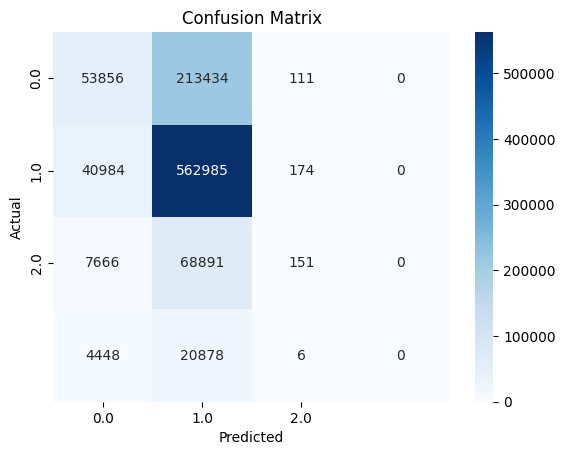

In [14]:
show_confusion_matrix(np.concatenate(incremental_xgb[2]),np.concatenate(incremental_xgb[3]))

In [18]:
# Calculate classification report
report = classification_report(np.concatenate(incremental_xgb[2]),np.concatenate(incremental_xgb[3]))

# Print classification report
print("Classification Report:")
print("----------------------")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
              precision    recall  f1-score   support

         0.0       0.20      0.50      0.29    106954
         1.0       0.93      0.65      0.77    866188
         2.0       0.00      0.34      0.00       442
         3.0       0.00      0.00      0.00         0

    accuracy                           0.63    973584
   macro avg       0.28      0.37      0.26    973584
weighted avg       0.85      0.63      0.71    973584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
retrain_xgb = train_xgboost(df_list,y_df_list,retrain=True)

1
Accuracy: 87.70%
0.8770491803278688


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2
Accuracy: 44.53%
0.6611594885521614


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3
Accuracy: 57.11%
0.6311367349502802


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4
Accuracy: 56.66%
0.6150081257832876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5
Accuracy: 54.27%
0.6005393120107653


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6
Accuracy: 61.08%
0.602244807755982


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7
Accuracy: 74.90%
0.6232074317428692


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8
Accuracy: 71.92%
0.6352078394173543


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9
Accuracy: 59.10%
0.6302998530667082


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10
Accuracy: 68.92%
0.6361924275807752


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11
Accuracy: 70.40%
0.6423542616861343


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12
Accuracy: 61.42%
0.6400044770916321


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13
Accuracy: 79.43%
0.6518709979261417


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14
Accuracy: 77.41%
0.6606027776139881
15
Accuracy: 55.21%
0.6533698711824848


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-8-c03a4a9e742a>:125: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array

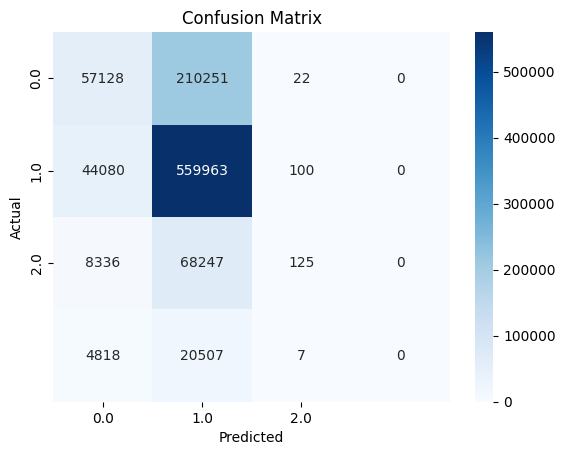

In [16]:
show_confusion_matrix(np.concatenate(retrain_xgb[2]),np.concatenate(retrain_xgb[3]))

In [20]:
# Calculate classification report
report = classification_report(np.concatenate(retrain_xgb[2]),np.concatenate(retrain_xgb[3]))

# Print classification report
print("Classification Report:")
print("----------------------")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
              precision    recall  f1-score   support

         0.0       0.21      0.50      0.30    114362
         1.0       0.93      0.65      0.77    858968
         2.0       0.00      0.49      0.00       254
         3.0       0.00      0.00      0.00         0

    accuracy                           0.63    973584
   macro avg       0.29      0.41      0.27    973584
weighted avg       0.84      0.63      0.71    973584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Masking
tf.random.set_seed(1)

def train_mlp(df_list, y_df_list, fs_masks=None,retrain=False):
    acc = []
    f1s=[]
    precisions =[]
    recalls=[]
    aucs=[]
    # Create logistic regression model
    model = Sequential()
    model.add(Masking(mask_value=-1, input_shape=(df_list[0].shape[1],)))
    model.add(Dense(64, activation='relu'))
    # input_dim is the number of features in your data
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # num_classes is the number of classes in your classification problem
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    classifier = model
    # MLPClassifier(
    #       activation="relu",
    #       max_iter=100,
    #       validation_fraction=0.2,
    #       early_stopping=True,
    #       random_state=42,verbose=True)
    results = []
    y_pred = []
    y_true = []
    for i in range(len(df_list)):
        if retrain:
          # Create logistic regression model
          model = Sequential()
          model.add(Masking(mask_value=-1, input_shape=(df_list[0].shape[1],)))
          model.add(Dense(64, activation='relu'))
          # input_dim is the number of features in your data
          model.add(Dense(32, activation='relu'))
          model.add(Dense(4, activation='softmax'))
          # num_classes is the number of classes in your classification problem
          model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
          classifier = model


        # Define your data and masks
        X = df_list[i].values
        # Define your labels
        y = y_df_list[i]
        if fs_masks is not None:
          print(X)
          X = np.where(np.array(fs_masks[i]) == 0, -1, X)
          print(fs_masks[i])
          print(X)
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        # if fs_masks is not None:
        #     masks_train = [fs_masks[i]] * len(X_train)
        #     masks_val = [fs_masks[i]] * len(X_val)
        #     masks_test = [fs_masks[i]] * len(X_test)

        #     # Apply masks to input data
        #     X_train_masked = X_train * masks_train
        #     X_val_masked = X_val * masks_val
        #     X_test_masked = X_test * masks_test
        # else:
        X_train_masked = X_train
        X_val_masked = X_val
        X_test_masked = X_test

        # # Convert masked data to sparse matrix
        # X_train_sparse = sparse.csr_matrix(X_train_masked)
        # X_val_sparse = sparse.csr_matrix(X_val_masked)
        # X_test_sparse = sparse.csr_matrix(X_test_masked)



        # Train logistic regression model on masked data
        history = classifier.fit(X_train_masked, y_train,validation_data=(X_val_masked,y_val),batch_size=int(X_train_masked.shape[0]*0.1),epochs=10,verbose=False)

        # print(mlp.score(X_train,y_train))


        # Make predictions on masked test data
        # preds = classifier.predict(X_test_masked)

        # Evaluate the accuracy of the model
        loss, accuracy = model.evaluate(X_test_masked, y_test)
        print("Accuracy: %.2f%%" % (accuracy * 100.0))
        acc.append(accuracy)
        print(np.mean(acc))
        preds = np.argmax(model.predict(X_test_masked), axis=-1)
        y_pred.append(preds)
        y_true.append(y_test)

        # Calculate F1 score
        f1 = f1_score(y_test, preds, average='weighted')
        f1s.append(f1)

        # Calculate precision
        precision = precision_score(y_test, preds, average='weighted')
        precisions.append(precision)

        # Calculate recall
        recall = recall_score(y_test, preds, average='weighted')
        recalls.append(recall)

        # Calculate AUC

        # Binarize the true labels
        y_true_binarized = label_binarize(y_test, classes=np.unique(y_test))

        # Calculate AUC for each class
        n_classes = len(np.unique(y_test))
        auc_scores = []

        for j in range(n_classes):
            y_true_j = y_true_binarized[:, j]     # True labels for class i
            y_pred_j = (preds == j).astype(int)  # Predicted labels for class i
            auc_j = roc_auc_score(y_true_j, y_pred_j)
            wighted_auc_j = ((preds==j).sum()/len(preds)) * auc_j
            auc_scores.append(auc_j)

        # Average the AUC scores
        mean_auc = np.mean(auc_scores)
        aucs.append(mean_auc)

        # Plot accuracy over epochs
        # plt.plot(history.history['accuracy'])
        # plt.plot(history.history['val_accuracy'])
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title(f'Logistic Regression Accuracy chunk {i+1}')
        # plt.show()
        results.append((history.history['accuracy'],history.history['val_accuracy']))
    return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array(precisions),np.array(recalls),np.array(aucs)

In [22]:
incremental_mlp = train_mlp(df_list, y_df_list)

8/8 [==============================] - 0s 5ms/step - loss: 0.4347 - accuracy: 0.8852
Accuracy: 88.52%
0.8852459192276001
8/8 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


892/892 [==============================] - 4s 5ms/step - loss: 1.0706 - accuracy: 0.4329
Accuracy: 43.29%
0.6590735614299774
892/892 [==============================] - 3s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1694/1694 [==============================] - 7s 4ms/step - loss: 0.9600 - accuracy: 0.5623
Accuracy: 56.23%
0.6268066565195719
1694/1694 [==============================] - 6s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2466/2466 [==============================] - 8s 3ms/step - loss: 0.9411 - accuracy: 0.5629
Accuracy: 56.29%
0.6108224987983704
2466/2466 [==============================] - 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2363/2363 [==============================] - 7s 3ms/step - loss: 0.9593 - accuracy: 0.5344
Accuracy: 53.44%
0.5955456137657166
2363/2363 [==============================] - 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2675/2675 [==============================] - 7s 3ms/step - loss: 0.9014 - accuracy: 0.6083
Accuracy: 60.83%
0.5976705749829611
2675/2675 [==============================] - 5s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2759/2759 [==============================] - 8s 3ms/step - loss: 0.7165 - accuracy: 0.7486
Accuracy: 74.86%
0.619233250617981
2759/2759 [==============================] - 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2317/2317 [==============================] - 6s 3ms/step - loss: 0.8371 - accuracy: 0.7192
Accuracy: 71.92%
0.631730429828167
2317/2317 [==============================] - 3s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6774/6774 [==============================] - 20s 3ms/step - loss: 0.8804 - accuracy: 0.5823
Accuracy: 58.23%
0.6262384454409281
6774/6774 [==============================] - 12s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2343/2343 [==============================] - 7s 3ms/step - loss: 0.8579 - accuracy: 0.6892
Accuracy: 68.92%
0.6325371623039245
2343/2343 [==============================] - 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2738/2738 [==============================] - 8s 3ms/step - loss: 0.8280 - accuracy: 0.7040
Accuracy: 70.40%
0.6390312910079956
2738/2738 [==============================] - 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1968/1968 [==============================] - 5s 3ms/step - loss: 0.9021 - accuracy: 0.6119
Accuracy: 61.19%
0.63677446047465
1968/1968 [==============================] - 5s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


770/770 [==============================] - 2s 3ms/step - loss: 0.6961 - accuracy: 0.7943
Accuracy: 79.43%
0.6488894453415504
770/770 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


637/637 [==============================] - 2s 3ms/step - loss: 0.7566 - accuracy: 0.7741
Accuracy: 77.41%
0.6578341935362134
637/637 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


26/26 [==============================] - 0s 3ms/step - loss: 0.9291 - accuracy: 0.5422
Accuracy: 54.22%
0.6501241564750672
26/26 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-21-fc086a90239d>:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array(precisions),np.array(recalls),np.array(aucs)


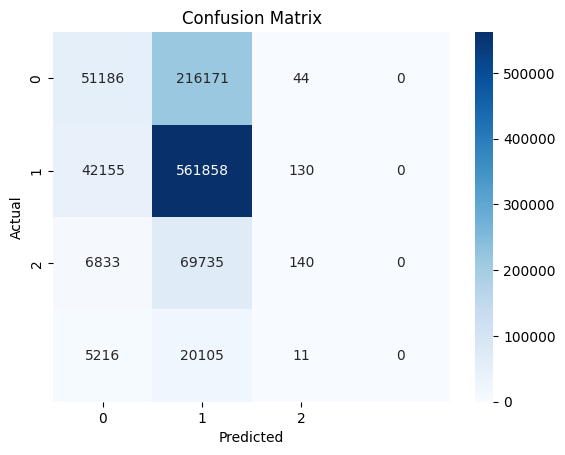

In [23]:
show_confusion_matrix(np.concatenate(incremental_mlp[2]),np.concatenate(incremental_mlp[3]))

In [24]:
# Calculate classification report
report = classification_report(np.concatenate(incremental_mlp[2]),np.concatenate(incremental_mlp[3]))

# Print classification report
print("Classification Report:")
print("----------------------")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.19      0.49      0.27    105390
           1       0.93      0.65      0.76    867869
           2       0.00      0.43      0.00       325
           3       0.00      0.00      0.00         0

    accuracy                           0.63    973584
   macro avg       0.28      0.39      0.26    973584
weighted avg       0.85      0.63      0.71    973584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
retrain_mlp = train_mlp(df_list, y_df_list,retrain=True)

8/8 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8852
Accuracy: 88.52%
0.8852459192276001
8/8 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


892/892 [==============================] - 2s 3ms/step - loss: 1.0765 - accuracy: 0.4393
Accuracy: 43.93%
0.6622970998287201
892/892 [==============================] - 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1694/1694 [==============================] - 5s 3ms/step - loss: 0.9696 - accuracy: 0.5645
Accuracy: 56.45%
0.6296936273574829
1694/1694 [==============================] - 3s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2466/2466 [==============================] - 7s 3ms/step - loss: 0.9528 - accuracy: 0.5619
Accuracy: 56.19%
0.612743690609932
2466/2466 [==============================] - 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2363/2363 [==============================] - 6s 3ms/step - loss: 0.9620 - accuracy: 0.5392
Accuracy: 53.92%
0.5980294823646546
2363/2363 [==============================] - 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2675/2675 [==============================] - 7s 3ms/step - loss: 0.9119 - accuracy: 0.6086
Accuracy: 60.86%
0.5997930367787679
2675/2675 [==============================] - 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2759/2759 [==============================] - 8s 3ms/step - loss: 0.7307 - accuracy: 0.7486
Accuracy: 74.86%
0.6210508857454572
2759/2759 [==============================] - 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2317/2317 [==============================] - 6s 3ms/step - loss: 0.8469 - accuracy: 0.7192
Accuracy: 71.92%
0.6333208605647087
2317/2317 [==============================] - 5s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6774/6774 [==============================] - 18s 3ms/step - loss: 0.8851 - accuracy: 0.5791
Accuracy: 57.91%
0.6273015406396654
6774/6774 [==============================] - 10s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2343/2343 [==============================] - 6s 3ms/step - loss: 0.8675 - accuracy: 0.6891
Accuracy: 68.91%
0.6334792733192444
2343/2343 [==============================] - 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2738/2738 [==============================] - 8s 3ms/step - loss: 0.8296 - accuracy: 0.7040
Accuracy: 70.40%
0.6398877555673773
2738/2738 [==============================] - 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1968/1968 [==============================] - 6s 3ms/step - loss: 0.9055 - accuracy: 0.6124
Accuracy: 61.24%
0.637596607208252
1968/1968 [==============================] - 3s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


770/770 [==============================] - 3s 4ms/step - loss: 0.7119 - accuracy: 0.7943
Accuracy: 79.43%
0.6496483500187213
770/770 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


637/637 [==============================] - 2s 3ms/step - loss: 0.7614 - accuracy: 0.7741
Accuracy: 77.41%
0.6585388907364437
637/637 [==============================] - 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


26/26 [==============================] - 0s 4ms/step - loss: 0.9396 - accuracy: 0.5298
Accuracy: 52.98%
0.6499547441800435
26/26 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-21-fc086a90239d>:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(results) , np.array(acc) ,np.array(y_pred),np.array(y_true),np.array(f1s),np.array(precisions),np.array(recalls),np.array(aucs)


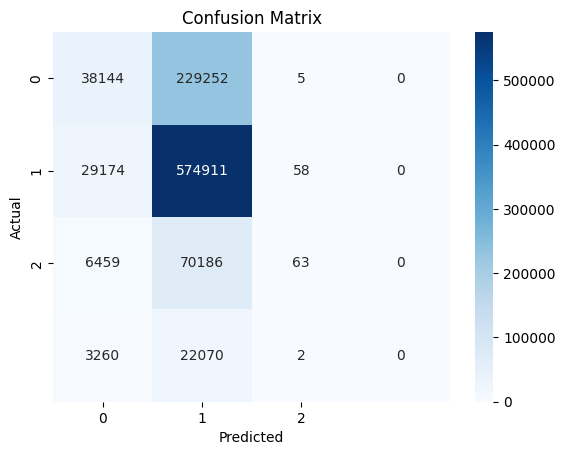

In [26]:
show_confusion_matrix(np.concatenate(retrain_mlp[2]),np.concatenate(retrain_mlp[3]))

In [27]:
# Calculate classification report
report = classification_report(np.concatenate(retrain_mlp[2]),np.concatenate(retrain_mlp[3]))

# Print classification report
print("Classification Report:")
print("----------------------")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.14      0.50      0.22     77037
           1       0.95      0.64      0.77    896419
           2       0.00      0.49      0.00       128
           3       0.00      0.00      0.00         0

    accuracy                           0.63    973584
   macro avg       0.27      0.41      0.25    973584
weighted avg       0.89      0.63      0.72    973584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from skmultiflow.drift_detection import DDM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np



# Initialize the DDM algorithm
ddm = DDM(min_num_instances=300000, warning_level=2.0, out_control_level=3.0)

# Initialize the model
model = LogisticRegression(max_iter=1000)
booster = None

# Iterate over consecutive chunks
for i in range(len(df_list)-1):
    X_train, X_test, y_train, y_test = train_test_split(df_list[i], y_df_list[i], test_size=0.2, random_state=42)

    dtrain = xgb.DMatrix(df_list[i], label=y_df_list[i])
    dtest = xgb.DMatrix(X_test)
    dnext = xgb.DMatrix(df_list[i+1])
    params = {'objective': 'multi:softmax', 'max_depth': 3,'num_class': 4,"eval_metric": ['merror']}




    # Train the model on the current chunk
    # model.fit(df_list[i], y_df_list[i])

    booster = xgb.train(params, dtrain, xgb_model=booster)

    ddm = DDM(min_num_instances=len(X_test), warning_level=2* len(df_list[i+1])//len(X_test), out_control_level=3*len(df_list[i+1])//len(X_test))
    ddm = DDM(min_num_instances=len(df_list[i+1])//2, warning_level=2, out_control_level=3)
    # Evaluate the model on the test set
    predictions = booster.predict(dtest) # model.predict(df_list[i+1])
    true_labels = y_test

    output = np.not_equal(true_labels, predictions).astype(int)
    print(output)
    # Update the DDM algorithm with the accuracy
    for j in range(len(output)):
      ddm.add_element(output[j])



    # Evaluate the model on the next chunk
    predictions = booster.predict(dnext) # model.predict(df_list[i+1])
    true_labels = y_df_list[i+1]

    # Calculate the accuracy of the model on the next chunk
    # accuracy = accuracy_score(true_labels, predictions)

    output = np.not_equal(true_labels, predictions).astype(int)
    print(output)
    # Update the DDM algorithm with the accuracy
    for j in range(len(output)):
      ddm.add_element(output[j])

      # Check for concept drift
      # if ddm.detected_warning_zone():
          # print(f"Warning zone drift detected between chunks {i} and {i + 1} at {j}")
      if ddm.detected_change():
          print(f"Concept drift detected between chunks {i} and {i + 1} at {j}")
          # print('RESET DDM')
          # ddm.reset()


    # Reset the DDM algorithm if drift is detected
    if ddm.detected_change():
        print('RESET DDM')
        ddm.reset()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 1 1 ... 0 0 0]
Concept drift detected between chunks 0 and 1 at 76664
[0 0 1 ... 0 1 0]
[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[0 1 0 ... 1 1 1]
Concept drift detected between chunks 2 and 3 at 150263
Concept drift detected between chunks 2 and 3 at 354797
[1 1 0 ... 0 1 1]
[1 0 1 ... 0 1 0]
[0 0 0 ... 1 0 1]
[0 0 0 ... 0 1 0]
[1 0 0 ... 0 1 1]
[0 0 1 ... 1 0 0]
Concept drift detected between chunks 5 and 6 at 207594
[0 1 1 ... 0 0 1]
[1 1 0 ... 1 0 0]
Concept drift detected between chunks 6 and 7 a

# Check drift on balanced data

In [29]:
with open('/content/drive/MyDrive/Covid files/balanced_data.pkl', 'rb') as f:
    balanced_data = pickle.load(f)

In [30]:
xtrain  = balanced_data['X_train']
ytrain = balanced_data['y_train']

xtest = balanced_data['X_test']
ytest = balanced_data['y_test']
xvalid = balanced_data['X_val']
yvalid = balanced_data['y_val']

In [31]:
from skmultiflow.drift_detection import ADWIN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
from scipy import sparse


# Define the number of chunks and their sizes
num_chunks = 15
chunk_size = 100

# Generate sample time series data
# Replace this with your own data loading/preparation process
time_series_data = np.random.rand(num_chunks * chunk_size, 5)
concept_variable = np.random.randint(2, size=num_chunks * chunk_size)

# Initialize the ADWIN algorithm
adwin = ADWIN(0.0001)

# Initialize the model
model = LogisticRegression()
booster = None
# Iterate over consecutive chunks
for i in range(len(xtrain)-1):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size

    X_train_sparse = sparse.csr_matrix(xtrain[i])
    X_test_sparse = sparse.csr_matrix(xtrain[i+1])
    dtrain = xgb.DMatrix(X_train_sparse, label=ytrain[i])
    dtest = xgb.DMatrix(X_test_sparse, label=ytrain[i+1])
    params = {'objective': 'multi:softmax', 'max_depth': 3,'num_class': 4,"eval_metric": ['merror']}
    booster = xgb.train(params, dtrain, xgb_model=booster, verbose_eval=False)

    # # Train the model on the current chunk
    # model.fit(df_list[i], y_df_list[i])

    # Evaluate the model on the next chunk
    predictions = booster.predict(dtest)
    true_labels = ytrain[i+1]

    # # Calculate the accuracy of the model on the next chunk
    # accuracy = accuracy_score(true_labels, predictions)

    # # Update the ADWIN algorithm with the accuracy
    # adwin.add_element(accuracy)

    output = np.not_equal(true_labels, predictions).astype(int)
    print(output)
    # Update the DDM algorithm with the accuracy
    for j in range(len(output)):
      adwin.add_element(output[j])


      # Check for concept drift
      if adwin.detected_change():
          print(f"Concept drift detected between chunks {i} and {i + 1} : {output[j]} at {j}")

          # Reset the ADWIN algorithm
          adwin.reset()

    # Take appropriate actions based on concept drift detection
    if adwin.detected_change():
        # Perform model updates, retraining, or system adaptations
        pass

[0 0 1 ... 1 1 1]
Concept drift detected between chunks 0 and 1 : 1 at 93087
Concept drift detected between chunks 0 and 1 : 1 at 119711
[1 1 1 ... 1 1 1]
Concept drift detected between chunks 1 and 2 : 0 at 154
Concept drift detected between chunks 1 and 2 : 1 at 176378
Concept drift detected between chunks 1 and 2 : 0 at 218938
Concept drift detected between chunks 1 and 2 : 1 at 295034
[0 1 0 ... 1 1 0]
Concept drift detected between chunks 2 and 3 : 1 at 3265
Concept drift detected between chunks 2 and 3 : 0 at 254913
Concept drift detected between chunks 2 and 3 : 0 at 308417
Concept drift detected between chunks 2 and 3 : 0 at 422689
[0 1 1 ... 1 0 1]
Concept drift detected between chunks 3 and 4 : 0 at 9264
Concept drift detected between chunks 3 and 4 : 1 at 250928
Concept drift detected between chunks 3 and 4 : 1 at 280560
Concept drift detected between chunks 3 and 4 : 0 at 385136
[1 1 1 ... 0 0 1]
Concept drift detected between chunks 4 and 5 : 1 at 6431
Concept drift detect

In [32]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
from scipy import sparse

def train_xgboost_balanced(xtrain,ytrain,xtest,ytest,xvalid,yvalid,fs_masks=None,retrain=False):
  booster = None
  acc=[]
  y_pred = np.array([])
  y_true = np.array([])
  results=[]
  for i in range(len(xtrain)):
    if retrain:
      booster = None

    X_train = xtrain[i]
    y_train = ytrain[i]

    X_test = xtest[i]
    y_test = ytest[i]

    X_val = xvalid[i]
    y_val = yvalid[i]

    if fs_masks != None :
      masks_train = [fs_masks[i]]*len(X_train)
      masks_val = [fs_masks[i]]*len(X_val)
      masks_test = [fs_masks[i]]*len(X_test)


      # Apply masks to input data
      X_train_masked = X_train * masks_train
      X_val_masked = X_val * masks_val
      X_test_masked = X_test * masks_test
    else:
      X_train_masked = X_train
      X_val_masked = X_val
      X_test_masked = X_test


    # Convert masked data to sparse matrix
    X_train_sparse = sparse.csr_matrix(X_train_masked)
    X_val_sparse = sparse.csr_matrix(X_val_masked)
    X_test_sparse = sparse.csr_matrix(X_test_masked)



    # eval_set = [(X_train, y_train), (X_val, y_val)]
    # eval_metric = ["mlogloss",'merror']
    dtrain = xgb.DMatrix(X_train_sparse, label=y_train)
    dval = xgb.DMatrix(X_val_sparse, label=y_val)
    dtest = xgb.DMatrix(X_test_sparse)
    params = {'objective': 'multi:softmax', 'max_depth': 3,'num_class': 4,"eval_metric": ['merror']}
    evals_result = {}
    # Train XGBoost model on masked data
    booster = xgb.train(params, dtrain, xgb_model=booster,evals=[(dtrain,'train'),(dval,'val')], verbose_eval=False,evals_result=evals_result)
    # print(booster.get_score(importance_type='gain'))

    # Make predictions on masked test data
    preds = booster.predict(dtest)
    y_pred = np.concatenate((y_pred,preds))
    y_true = np.concatenate((y_true,y_test))
    print(len(y_true))

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, preds)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    acc.append(accuracy)
    print(np.mean(acc))


    epochs = len(evals_result['train']['merror'])
    x_axis = range(0, epochs)

    fig, ax = plt.subplots()
    ax.plot(x_axis, np.array([1] * epochs) -np.array(evals_result['train']['merror']), label='Train')
    ax.plot(x_axis, np.array([1] * epochs)-np.array(evals_result['val']['merror']), label='valid')
    ax.legend()
    plt.xlabel('epoch')
    plt.ylabel('ACC')
    plt.title(f'XGBoost Accuracy chunk {i+1}')
    # plt.savefig(f'ss {i+1}.jpg')
    plt.show()
    results.append((np.array([1] * epochs) -np.array(evals_result['train']['merror']),np.array([1] * epochs)-np.array(evals_result['val']['merror'])))
  return results , acc ,y_pred,y_true

244
Accuracy: 79.92%
0.7991803278688525


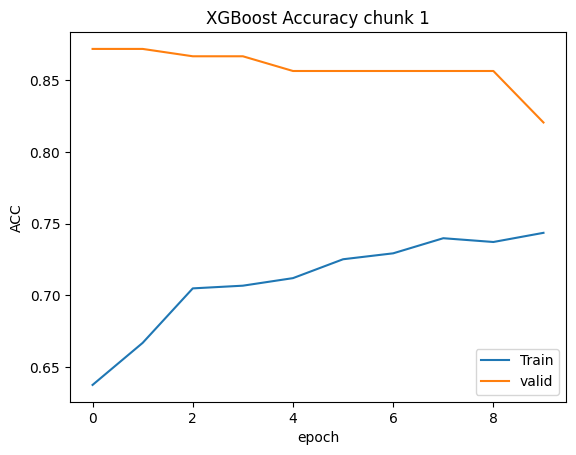

28784
Accuracy: 37.84%
0.5887982928762623


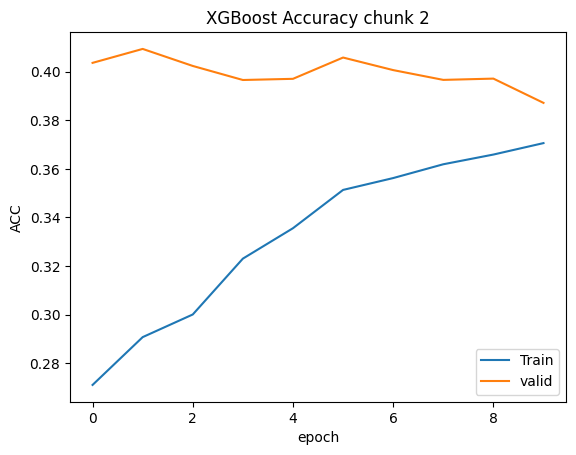

82989
Accuracy: 39.44%
0.5239960823461279


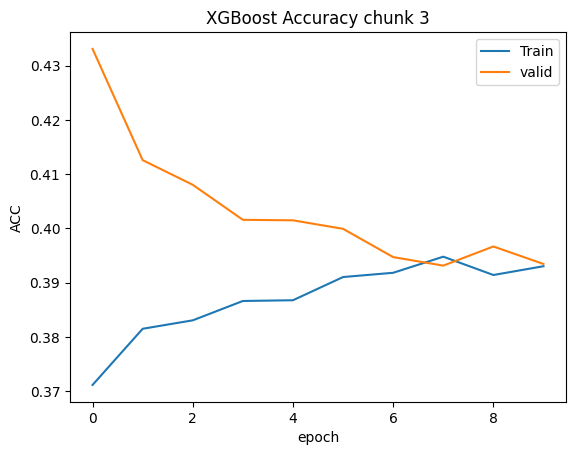

161874
Accuracy: 39.19%
0.49097513110104235


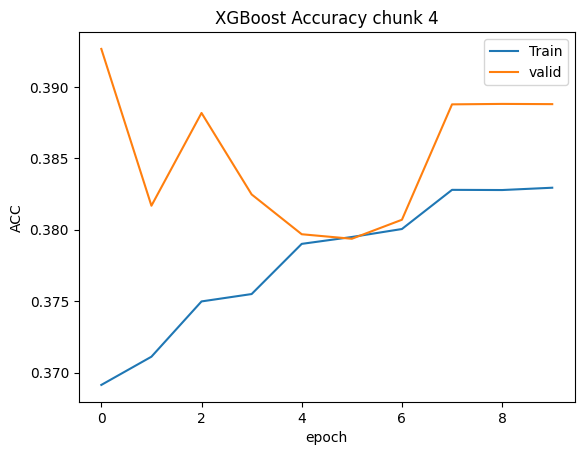

237488
Accuracy: 35.21%
0.46319034637050505


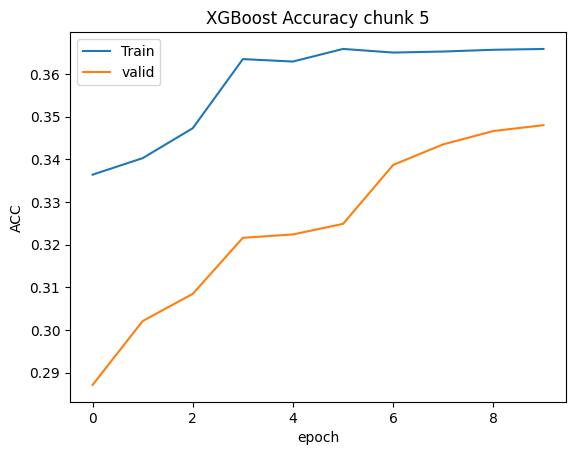

323078
Accuracy: 35.31%
0.4448442355595623


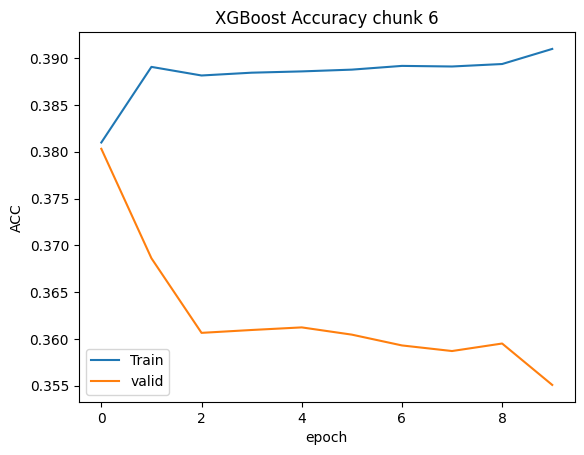

411343
Accuracy: 43.65%
0.4436527319678381


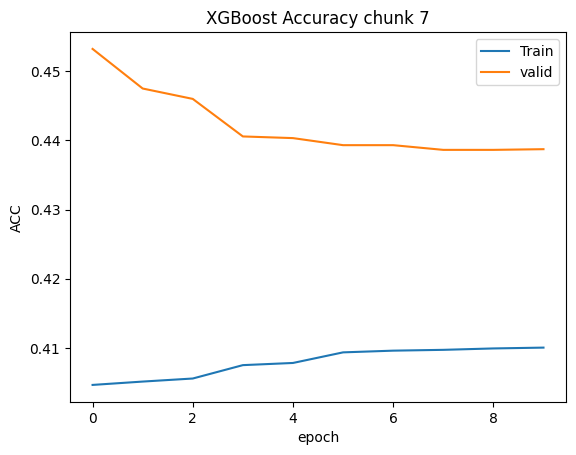

485484
Accuracy: 33.05%
0.42951099999627806


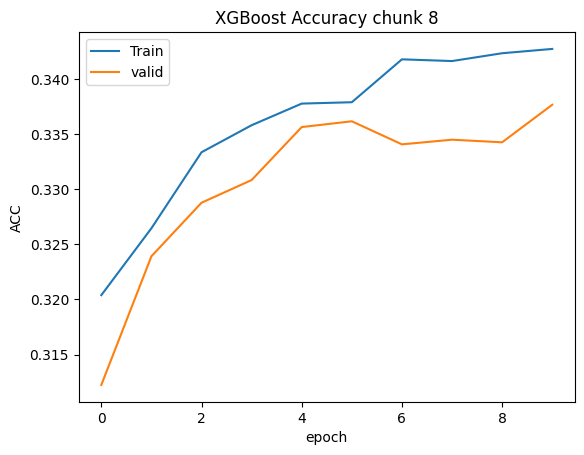

702239
Accuracy: 38.04%
0.42405135056915055


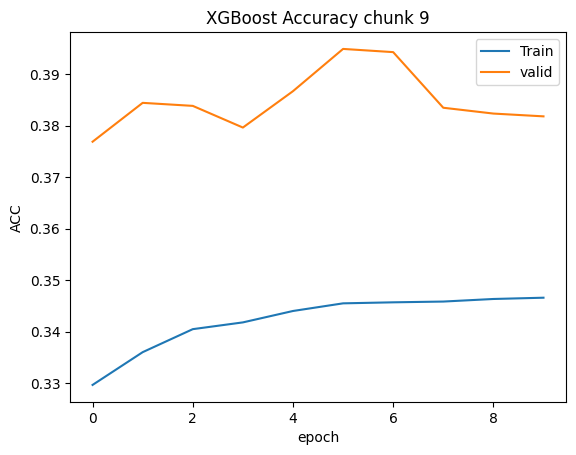

777213
Accuracy: 37.91%
0.4195540235523561


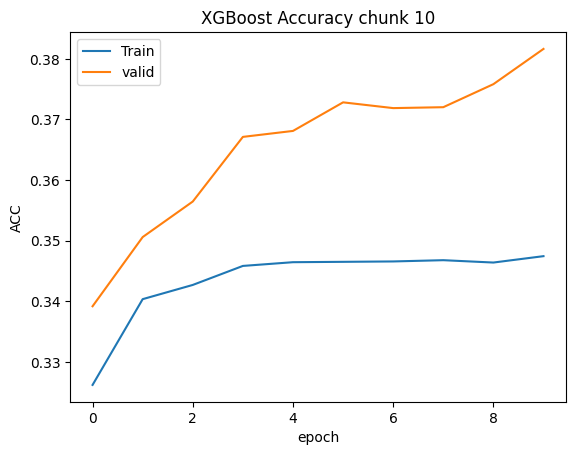

864813
Accuracy: 38.72%
0.4166099259359319


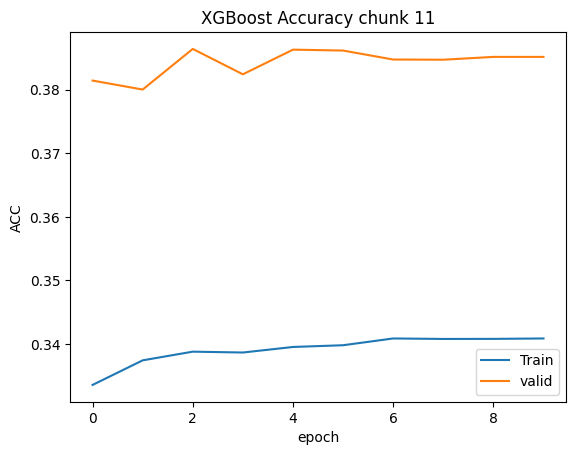

927779
Accuracy: 35.29%
0.4113038075592393


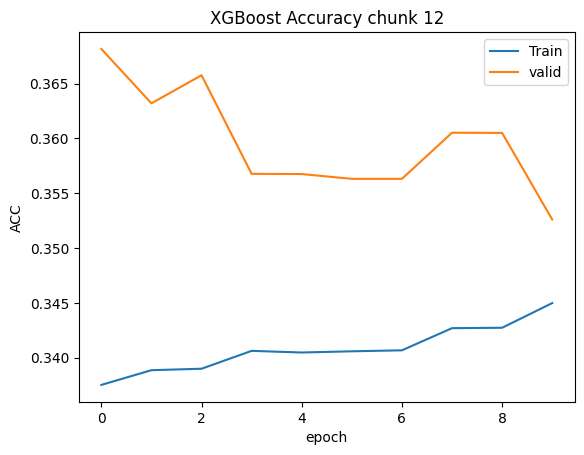

952418
Accuracy: 40.79%
0.4110443236439577


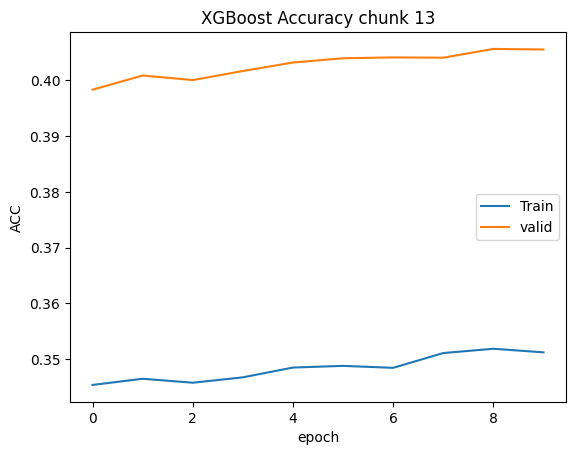

972778
Accuracy: 34.68%
0.4064559766421651


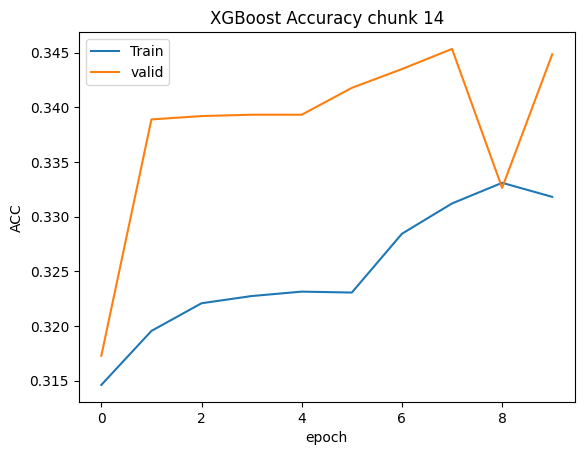

973584
Accuracy: 52.73%
0.4145119305566742


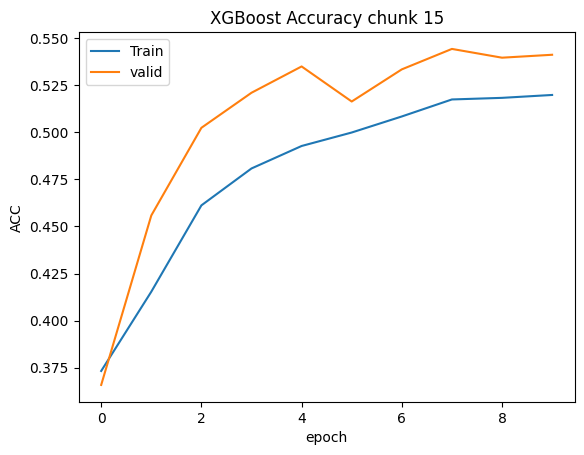

([(array([0.63759398, 0.66691729, 0.70488722, 0.70676692, 0.71203008,
          0.72518797, 0.72932331, 0.73984962, 0.73721805, 0.74360902]),
   array([0.87179487, 0.87179487, 0.86666667, 0.86666667, 0.85641026,
          0.85641026, 0.85641026, 0.85641026, 0.85641026, 0.82051282])),
  (array([0.27104407, 0.2907169 , 0.30003997, 0.3230272 , 0.33554753,
          0.35130647, 0.35618506, 0.36186296, 0.36585954, 0.37057275]),
   array([0.40360021, 0.40933777, 0.40233006, 0.3965487 , 0.39703048,
          0.40579012, 0.40062193, 0.3965925 , 0.39711808, 0.3871321 ])),
  (array([0.37114599, 0.38149611, 0.38305209, 0.38661853, 0.38675462,
          0.39103229, 0.39181542, 0.3947836 , 0.39140716, 0.39302477]),
   array([0.43307813, 0.41257725, 0.40803431, 0.40157735, 0.4014851 ,
          0.39991698, 0.39470529, 0.39313716, 0.39666544, 0.39343695])),
  (array([0.36913047, 0.37110635, 0.37497821, 0.37549397, 0.37900806,
          0.37948932, 0.38004867, 0.38279093, 0.38277822, 0.38293985]),
   

In [33]:
train_xgboost_balanced(xtrain,ytrain,xtest,ytest,xvalid,yvalid)

In [34]:
xx =[pd.concat([xtrain[i],xvalid[i],xtest[i]]) for i in range(len(xtrain))]
yy =[np.concatenate([ytrain[i],yvalid[i],ytest[i]]) for i in range(len(ytrain))]

In [35]:
from skmultiflow.drift_detection import ADWIN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
from scipy import sparse


# Define the number of chunks and their sizes
num_chunks = 15
chunk_size = 100

# Generate sample time series data
# Replace this with your own data loading/preparation process
time_series_data = np.random.rand(num_chunks * chunk_size, 5)
concept_variable = np.random.randint(2, size=num_chunks * chunk_size)

# Initialize the ADWIN algorithm
adwin = ADWIN(0.0001)

# Initialize the model
model = LogisticRegression()
booster = None
# Iterate over consecutive chunks
for i in range(len(xx)-1):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size

    X_train_sparse = sparse.csr_matrix(xx[i])
    X_test_sparse = sparse.csr_matrix(xx[i+1])
    dtrain = xgb.DMatrix(X_train_sparse, label=yy[i])
    dtest = xgb.DMatrix(X_test_sparse, label=yy[i+1])
    params = {'objective': 'multi:softmax', 'max_depth': 3,'num_class': 4,"eval_metric": ['merror']}
    booster = xgb.train(params, dtrain, xgb_model=booster, verbose_eval=False)

    # # Train the model on the current chunk
    # model.fit(df_list[i], y_df_list[i])

    # Evaluate the model on the next chunk
    predictions = booster.predict(dtest)
    true_labels = yy[i+1]

    # # Calculate the accuracy of the model on the next chunk
    # accuracy = accuracy_score(true_labels, predictions)

    # # Update the ADWIN algorithm with the accuracy
    # adwin.add_element(accuracy)

    output = np.not_equal(true_labels, predictions).astype(int)
    print(output)
    # Update the DDM algorithm with the accuracy
    for j in range(len(output)):
      adwin.add_element(output[j])


      # Check for concept drift
      if adwin.detected_change():
          print(f"Concept drift detected between chunks {i} and {i + 1} : {output[j]} at {j}")

          # Reset the ADWIN algorithm
          adwin.reset()

    # Take appropriate actions based on concept drift detection
    if adwin.detected_change():
        # Perform model updates, retraining, or system adaptations
        pass

[0 0 1 ... 0 0 0]
Concept drift detected between chunks 0 and 1 : 1 at 92671
Concept drift detected between chunks 0 and 1 : 1 at 145343
[1 0 1 ... 0 0 0]
Concept drift detected between chunks 1 and 2 : 0 at 4654
Concept drift detected between chunks 1 and 2 : 1 at 176046
Concept drift detected between chunks 1 and 2 : 1 at 224014
Concept drift detected between chunks 1 and 2 : 1 at 297742
Concept drift detected between chunks 1 and 2 : 1 at 391374
[0 1 0 ... 0 1 1]
Concept drift detected between chunks 2 and 3 : 1 at 47860
Concept drift detected between chunks 2 and 3 : 1 at 256020
Concept drift detected between chunks 2 and 3 : 0 at 312436
Concept drift detected between chunks 2 and 3 : 1 at 418932
Concept drift detected between chunks 2 and 3 : 0 at 551764
[0 0 1 ... 1 0 1]
Concept drift detected between chunks 3 and 4 : 1 at 16314
Concept drift detected between chunks 3 and 4 : 1 at 281914
Concept drift detected between chunks 3 and 4 : 1 at 385658
Concept drift detected between ch